In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
import pandas as pd

df = pd.read_csv("Joules_of_Siam_Data - Dataset_Strech.csv")
df.head()

,Year,Month,Population,Temperature,CPI,Peak
0,2022,12,66.090000,26.300000,106.470000,27124.7
1,2022,11,66.083333,26.249167,106.470000,27832.7
2,2022,10,66.076667,26.198333,106.470000,27041.9
3,2022,9,66.070000,26.147500,106.470000,27808.0
4,2022,8,66.063333,26.096667,108.503333,28951.8


In [3]:
df.shape

(252, 6)

In [4]:
df['Date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

In [5]:
X = df[['Date','Peak']]
# X = df.drop(columns=['Year','Month'],axis=1)
X.head()

,Date,Peak
0,2022-12,27124.7
1,2022-11,27832.7
2,2022-10,27041.9
3,2022-09,27808.0
4,2022-08,28951.8


In [6]:
X = X.iloc[::-1]
X = X.reset_index(drop=False)
X.drop(columns = ['index'], inplace=True)
X.set_index('Date', inplace=True)
X.head()

,Peak
Date,
2002-01,14552.5
2002-02,15260.8
2002-03,16485.3
2002-04,16681.1
2002-05,16293.1


In [7]:
X.shape

(252, 1)

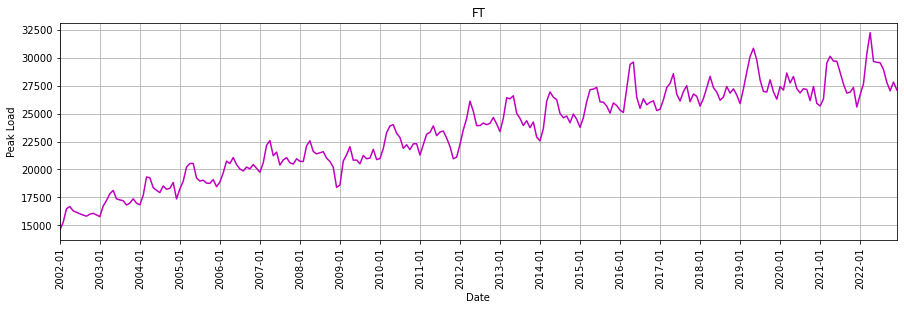

In [8]:
#### PREPARE DATA ####
x = np.arange(X.shape[0]).reshape(-1,1)
y = np.array(X['Peak']).reshape(-1,1)

plt.figure(figsize=(15,4))
plt.title('FT')
plt.ylabel('Peak Load')
plt.xlabel('Date')
plt.plot(X,'-m')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.xticks(X.index[::12], rotation=90)
plt.show()

In [9]:
polyFeat = PolynomialFeatures(degree=4)
x = polyFeat.fit_transform(x)

In [10]:
model = linear_model.LinearRegression()
model.fit(x,y)
accuracy = model.score(x,y)
print(f'Accuracy : ', round(accuracy*100,3),'%')

Accuracy :  91.84 %


In [11]:
y0 = model.predict(x)

0.03 Million


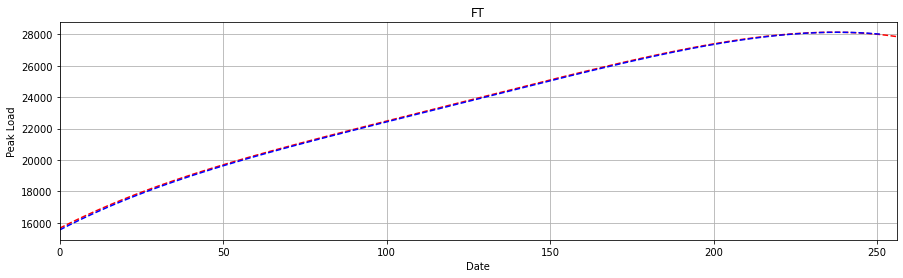

In [12]:
#### PREDICTION ####
month = 6
print(round(int(model.predict(polyFeat.fit_transform([[252+month]])))/1000000,2),'Million')

x1 = np.array(list(range(1, 252+month))).reshape(-1,1)
y1 = model.predict(polyFeat.fit_transform(x1))
plt.figure(figsize=(15,4))
plt.title('FT')
plt.ylabel('Peak Load')
plt.xlabel('Date')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(y1,'--r')
plt.plot(y0,'--b')
# plt.xticks(X.index[::12], rotation=90)
plt.show()